In [10]:
# here put the import lib

import pandas as pd
import ydata_profiling
import numpy as np

def ts_profiling(df: pd.DataFrame, output_file: str = "profiling_report.html") -> None:
    profile = ydata_profiling.ProfileReport(df, tsmode=True)
    profile.to_file(output_file)
raw_data  = pd.read_csv(r"qiyeshuju-4S间隔.csv", encoding="gbk")


<Axes: xlabel='时间'>

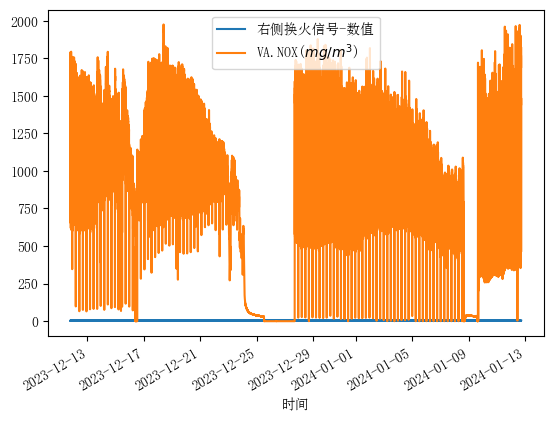